In [2]:
library(tidyverse)
library(dplyr)
library(GGally)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ───────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


In [3]:
wine_quality <- read_csv("data/winequality-red.csv")
sum(wine_quality$quality >= 7)

Rows: 1599 Columns: 12
── Column specification ───────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, tot...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 217

**No need for cleaning, since there are no N/A values in any columns**

In [6]:
colSums(is.na(wine_quality))

       fixed acidity     volatile acidity          citric acid       residual sugar            chlorides 
                   0                    0                    0                    0                    0 
 free sulfur dioxide total sulfur dioxide              density                   pH            sulphates 
                   0                    0                    0                    0                    0 
             alcohol              quality 
                   0                    0 

In [4]:
red_wine <- wine_quality %>% 
  mutate(quality = ifelse(quality >= 7, 1, 0))

sum(red_wine$quality == 1)
red_wine$quality <- as.factor(red_wine$quality)
levels(red_wine$quality)

[1] "0" "1"

Ensure that the `quality` is a factor after mutating to binary in preparation of logistic regression 

## Initial EDA ##

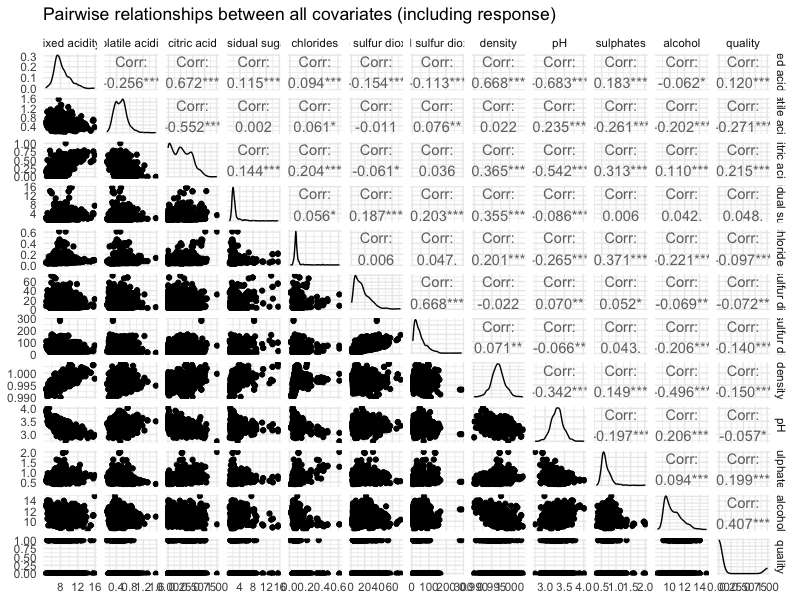

In [5]:
pairwise_wine <- red_wine %>%
  ggpairs() + 
  theme_minimal() + 
  labs(title = "Pairwise relationships between all covariates (including response)")

pairwise_wine

*Note that all of the covariates are continous.*

Problematic covariate correlations: (>=|.5|)
- citric acid ~ fixed acidity
- density ~ fixed acidity
- pH ~ fixed acidity
- density ~ fixed acidity
- total sulfur dioxide ~ free sulfur dioxide
- citric acid ~ volatile acidity

**It seems that `fixed acidity` has high correlation with many of the other covariates which may suggest multicollinearity in the full fitted model, worth considering removing**

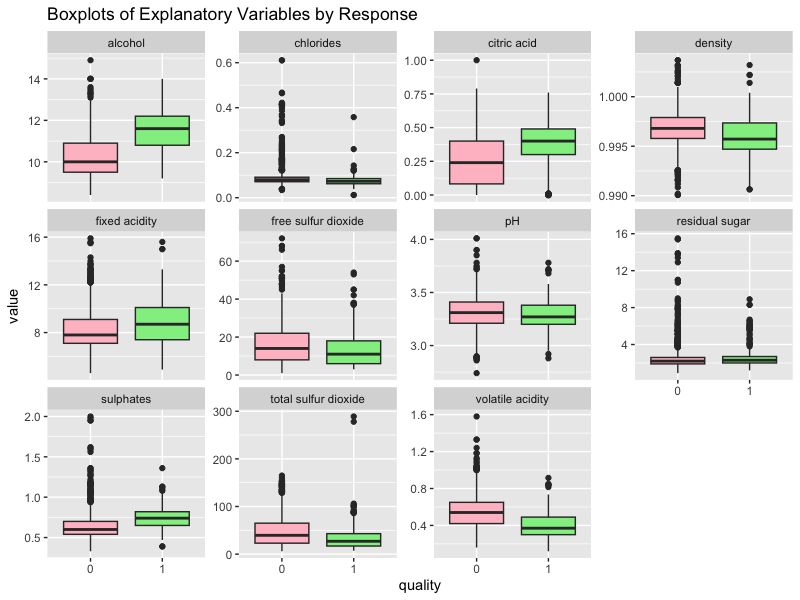

In [6]:
red_wine_long <- pivot_longer(red_wine, cols = -quality)

density_wine <- red_wine_long %>%
  ggplot(aes(x = quality, y = value, fill = quality)) +
  geom_boxplot() +
  facet_wrap(~ name, scales = "free_y") +
  scale_fill_manual(values = c("1"="lightgreen", "0"="pink" )) +
  theme(legend.position = "none") +
  labs(title = "Boxplots of Explanatory Variables by Response")
density_wine

If we take a closer look at the relationships between the explanatory variables and the response (quality), we can see that the covariates with the greatest individual effects are alcohol, sulphates, density, and citric acid (the medians have the greatest differences). Important to note that for the less greater differences, there are many outliers. 


## A closer look at `residual sugar` and `alcohol percentage` ##

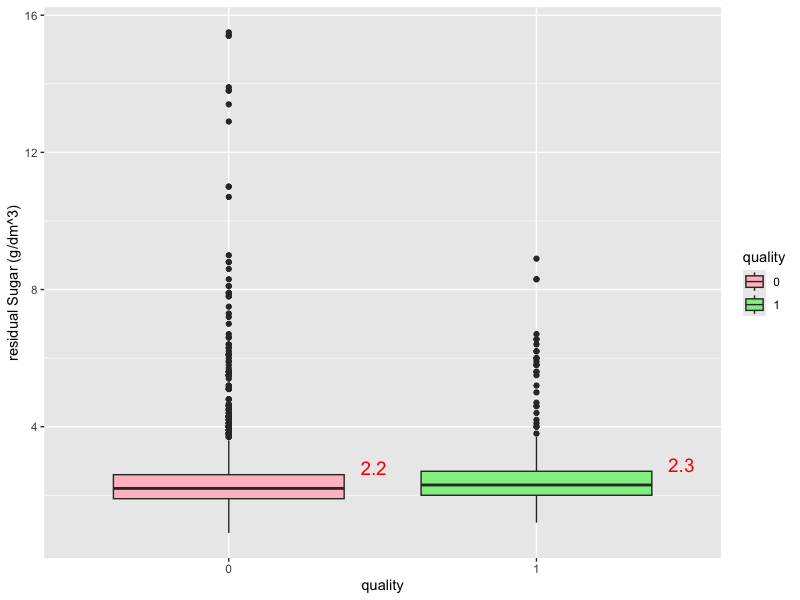

In [22]:
sug <- red_wine %>%
  ggplot(aes(x = quality, y = `residual sugar`, fill = quality)) + 
  geom_boxplot() + 
  labs(x = "quality", y="residual Sugar (g/dm^3)") +
  stat_summary(fun = median, 
      geom = "text", 
      aes(label = round(..y.., 1)), 
      vjust = -1, 
      hjust = -5,
      color = "red", 
      size = 5) +
  scale_fill_manual(values = c("1"="lightgreen", "0"="pink" )) 
sug

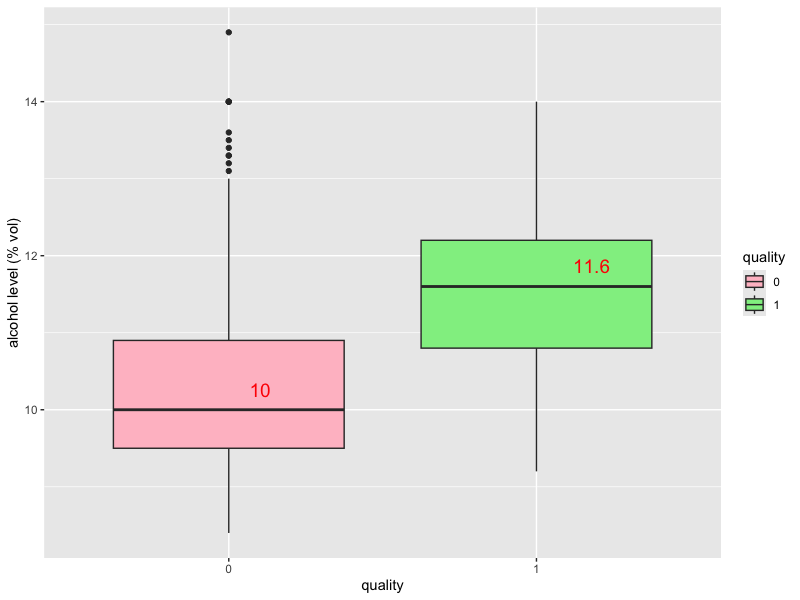

In [24]:
alc <- red_wine %>%
  ggplot(aes(x = quality, y = alcohol, fill = quality)) + 
  geom_boxplot() + 
  labs(x = "quality", y="alcohol level (% vol)") +
  stat_summary(fun = median, 
      geom = "text", 
      aes(label = round(..y.., 1)), 
      vjust = -1, 
      hjust = -1,
      color = "red", 
      size = 5) +
  scale_fill_manual(values = c("1"="lightgreen", "0"="pink" )) 
alc

Warning message:
The dot-dot notation (`..y..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(y)` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated. 


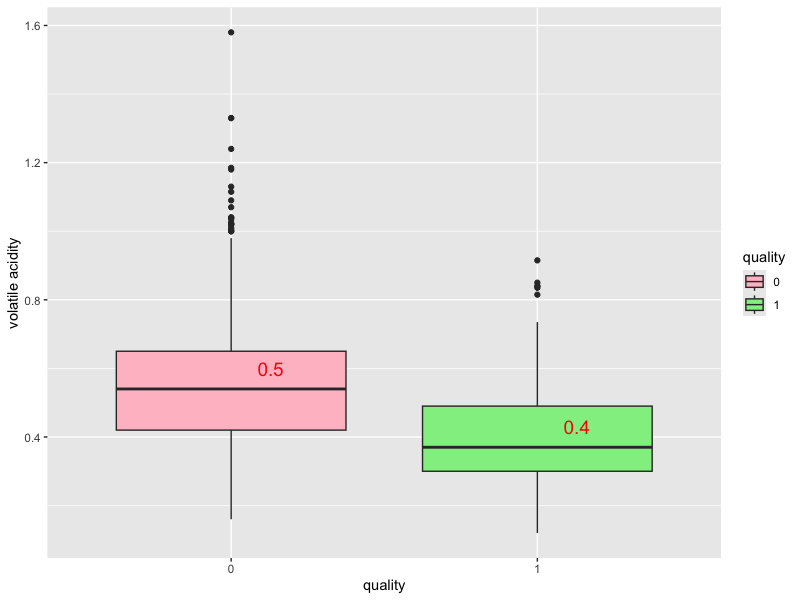

In [ ]:
volt <- red_wine %>%
  ggplot(aes(x = quality, y = `volatile acidity`, fill = quality)) + 
  geom_boxplot() + 
  labs(x = "quality", y="volatile acidity") +
  stat_summary(fun = median, 
      geom = "text", 
      aes(label = round(..y.., 1)), 
      vjust = -1, 
      hjust = -1,
      color = "red", 
      size = 5) +
  scale_fill_manual(values = c("1"="lightgreen", "0"="pink" )) 

volt

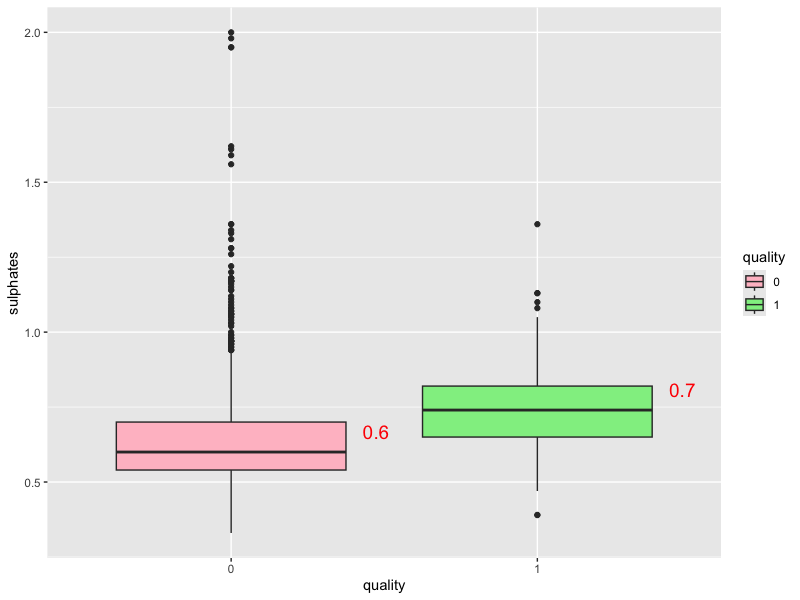

In [9]:
sul <- red_wine %>%
  ggplot(aes(x = quality, y = sulphates, fill = quality)) + 
  geom_boxplot() + 
  labs(x = "quality", y="sulphates") +
  stat_summary(fun = median, 
      geom = "text", 
      aes(label = round(..y.., 1)), 
      vjust = -1, 
      hjust = -5,
      color = "red", 
      size = 5) +
  scale_fill_manual(values = c("1"="lightgreen", "0"="pink" )) 

sul